In [1]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [4]:
df = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=0)

In [5]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [43]:
df[df['original_language'] == 'en']

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7
...,...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,10
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,5
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,10
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,6


The metric 'popularity' seems is a little bit of a black box. It seems like it is calculated using the following equation:

The formula for calculating the Top Rated 250 Titles gives a true Bayesian estimate: weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:

R = average for the movie (mean) = (Rating)
v = number of votes for the movie = (votes)
m = minimum votes required to be listed in the Top 250 (currently 3000)
C = the mean vote across the whole report (currently 6.9)

I wonder why they chose to use the mean in this instance as it would me heavily influenced by outliers.

In [6]:
df.vote_count.mean()

194.22483689708488

In [7]:
df.vote_count.median()

5.0

Let's convert the release date column to year and month. This way we can sort values by year first and then month.

In [28]:
df['year'] = df.release_date.apply(lambda x: x.split('-')[0]).astype(int)

In [30]:
df['month'] = df.release_date.apply(lambda x: x.split('-')[1]).astype(int)

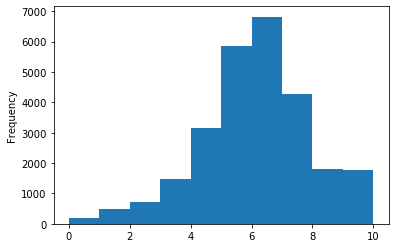

In [40]:
df.sort_values(['year','month'], ascending = False)['vote_average'].iloc[:100000].plot(kind='hist');

Interestingly, the distribution of vote_average changes very little as you reduce or increase the size of the of the sample set. Further explore this idea, we can correlate vote_average and year.

In [39]:
df[['id','year','vote_average','popularity']].corr()

,id,year,vote_average,popularity
id,1.000000,0.643513,0.116085,-0.148720
year,0.643513,1.000000,0.040562,0.016623
vote_average,0.116085,0.040562,1.000000,0.065273
popularity,-0.148720,0.016623,0.065273,1.000000
